# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


['namibe',
 'port-aux-francais',
 'papatowai',
 'puerto baquerizo moreno',
 'klaksvik',
 'mount pearl',
 'menongue',
 'enewetak',
 'adamstown',
 'polyarnyy',
 'ocean shores',
 'puerto natales',
 'san jose village',
 'olonkinbyen',
 'carnarvon',
 'saint-philippe',
 'college',
 'castillos',
 'isafjordur',
 'tosno',
 'saint-pierre',
 'sao gabriel da cachoeira',
 'avarua',
 'rongelap',
 'bargaal',
 'edinburgh of the seven seas',
 'dar naim',
 'miches',
 'ust-nera',
 'torghay',
 'tolanaro',
 'mersa matruh',
 'kuqa',
 'bilibino',
 'saipan',
 'nemuro',
 'obo',
 'roma',
 'tiksi',
 'lebu',
 'yeniseysk',
 'hawaiian paradise park',
 'puerto ayora',
 'arraial do cabo',
 'port augusta',
 'khandyga',
 'napier',
 'bethel',
 'al kharijah',
 'anadyr',
 'katsuura',
 'vadso',
 'port lincoln',
 'naze',
 'stanley',
 'ketchikan',
 'junin de los andes',
 'yellowknife',
 'novodvinsk',
 'praia da vitoria',
 'maralal',
 'carthage',
 'magadan',
 'ilulissat',
 'maiurno',
 'sakakah',
 'albany',
 'hami',
 'vilyuchi

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
city_weather = requests.get(city_url).json

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namibe
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | puerto baquerizo moreno
Processing Record 5 of Set 1 | klaksvik
Processing Record 6 of Set 1 | mount pearl
Processing Record 7 of Set 1 | menongue
Processing Record 8 of Set 1 | enewetak
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | polyarnyy
Processing Record 11 of Set 1 | ocean shores
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | san jose village
City not found. Skipping...
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | castillos
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | tosno
Processing Record 21 of Set 1 | saint-pierre
P

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,namibe,-15.1961,12.1522,22.72,70,3,3.00,AO,1715039934
1,port-aux-francais,-49.3500,70.2167,6.93,97,100,13.27,TF,1715039650
2,papatowai,-46.5619,169.4708,10.72,73,76,5.80,NZ,1715039935
3,puerto baquerizo moreno,-0.9000,-89.6000,23.69,88,7,3.41,EC,1715039935
4,klaksvik,62.2266,-6.5890,4.51,76,49,5.15,FO,1715039935


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namibe,-15.1961,12.1522,22.72,70,3,3.00,AO,1715039934
1,port-aux-francais,-49.3500,70.2167,6.93,97,100,13.27,TF,1715039650
2,papatowai,-46.5619,169.4708,10.72,73,76,5.80,NZ,1715039935
3,puerto baquerizo moreno,-0.9000,-89.6000,23.69,88,7,3.41,EC,1715039935
4,klaksvik,62.2266,-6.5890,4.51,76,49,5.15,FO,1715039935


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

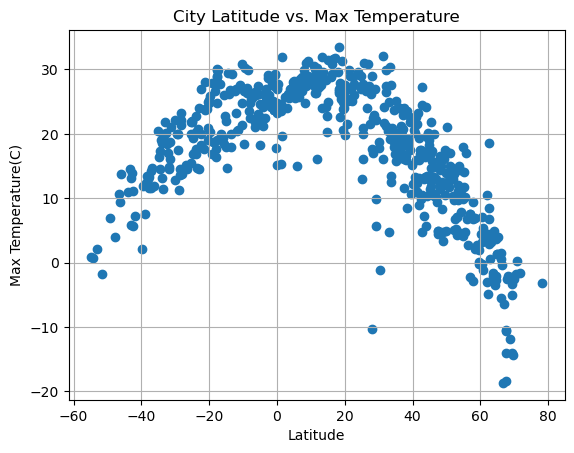

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

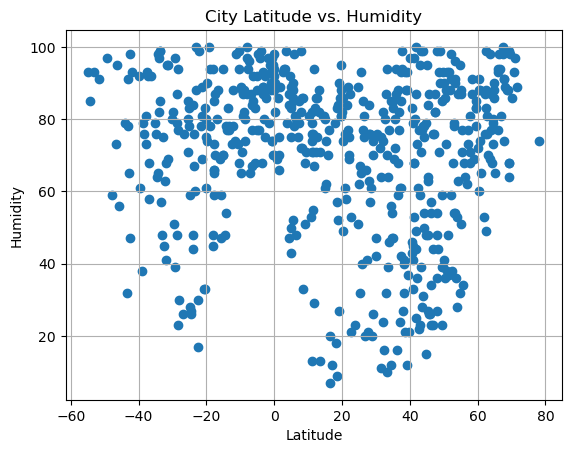

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

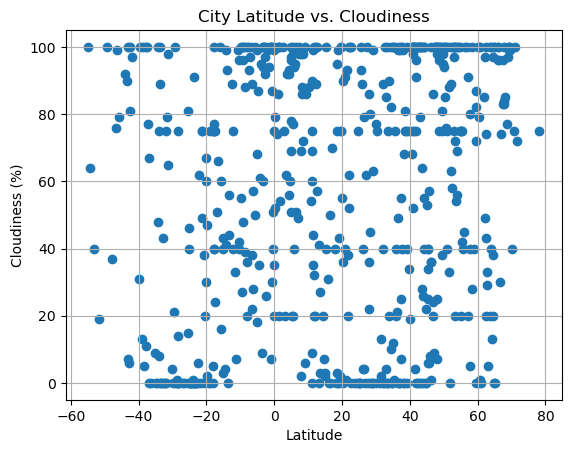

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

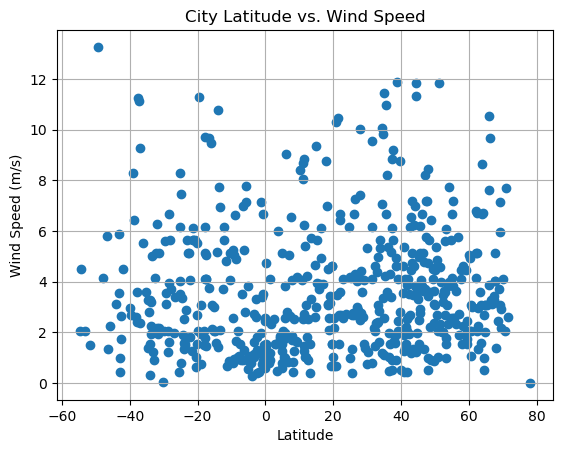

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots



NameError: name 'Lat' is not defined

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,klaksvik,62.2266,-6.5890,4.51,76,49,5.15,FO,1715039935
5,mount pearl,47.5166,-52.7813,4.52,82,100,7.20,CA,1715039664
7,enewetak,11.3474,162.3373,27.90,76,99,8.84,MH,1715039678
9,polyarnyy,69.1989,33.4478,-3.39,68,100,5.98,RU,1715039936
10,ocean shores,46.9737,-124.1563,12.99,76,20,8.23,US,1715039801


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namibe,-15.1961,12.1522,22.72,70,3,3.00,AO,1715039934
1,port-aux-francais,-49.3500,70.2167,6.93,97,100,13.27,TF,1715039650
2,papatowai,-46.5619,169.4708,10.72,73,76,5.80,NZ,1715039935
3,puerto baquerizo moreno,-0.9000,-89.6000,23.69,88,7,3.41,EC,1715039935
6,menongue,-14.6585,17.6910,14.75,48,4,1.59,AO,1715039935


###  Temperature vs. Latitude Linear Regression Plot

r value is -0.8356780520773767


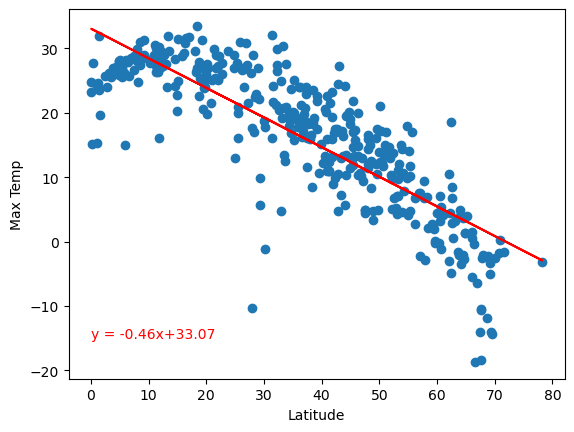

In [49]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
northern_hemi_line = northern_hemi_df['Lat']*round(slope,2) + round(intercept,2)
line = f'y = {round(slope,2)}x+{round(intercept,2)}'
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], northern_hemi_line, color='red')
plt.annotate(line, (0,-15),color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'r value is {rvalue}')


r value is 0.8044150110004697


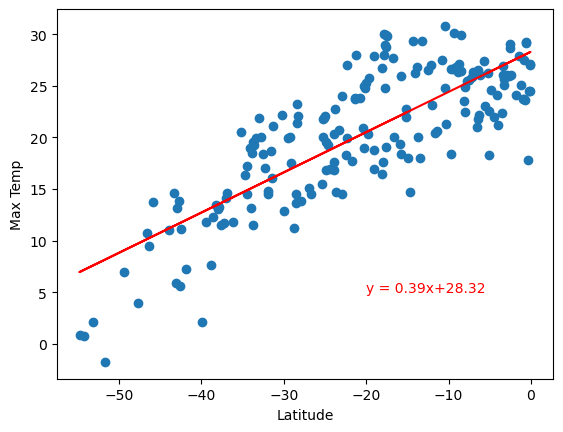

In [51]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
southern_hemi_line = southern_hemi_df['Lat']*round(slope,2) + round(intercept,2)
line = f'y = {round(slope,2)}x+{round(intercept,2)}'
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], southern_hemi_line, color='red')
plt.annotate(line, (-20,5),color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'r value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r value is 0.053800619974419775


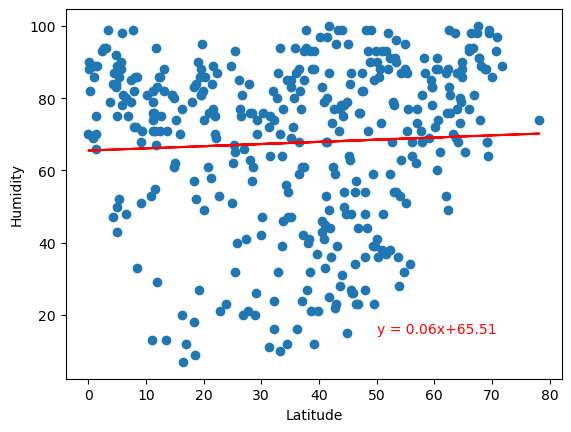

In [53]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
northern_hemi_line = northern_hemi_df['Lat']*round(slope,2) + round(intercept,2)
line = f'y = {round(slope,2)}x+{round(intercept,2)}'
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], northern_hemi_line, color='red')
plt.annotate(line, (50,15),color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'r value is {rvalue}')

The r-value is: 0.0002808747046324607


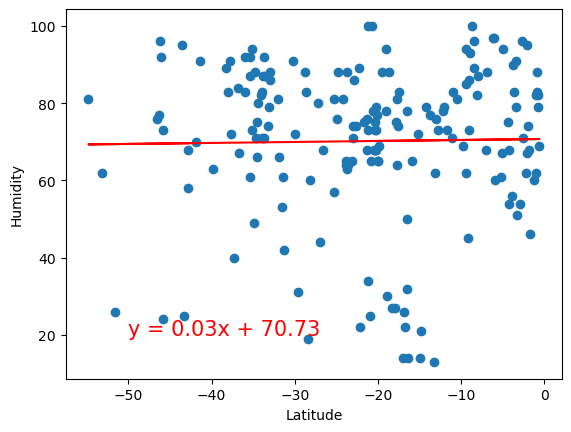

In [18]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
southern_hemi_line = southern_hemi_df['Lat']*round(slope,2) + round(intercept,2)
line = f'y = {round(slope,2)}x+{round(intercept,2)}'
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], southern_hemi_line, color='red')
plt.annotate(line, (-20,5),color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'r value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r value is 0.10196578917056202


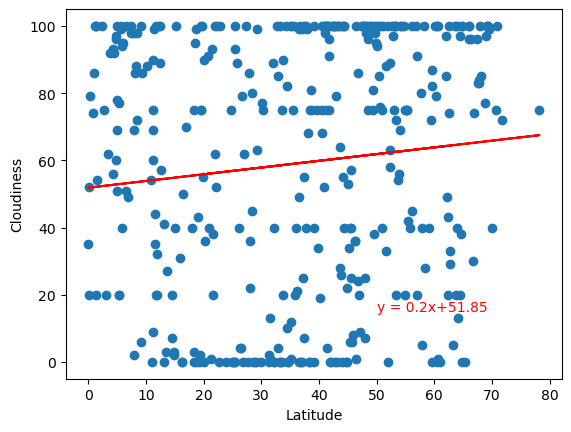

In [55]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
northern_hemi_line = northern_hemi_df['Lat']*round(slope,2) + round(intercept,2)
line = f'y = {round(slope,2)}x+{round(intercept,2)}'
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], northern_hemi_line, color='red')
plt.annotate(line, (50,15),color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'r value is {rvalue}')

r value is 0.208134388749032


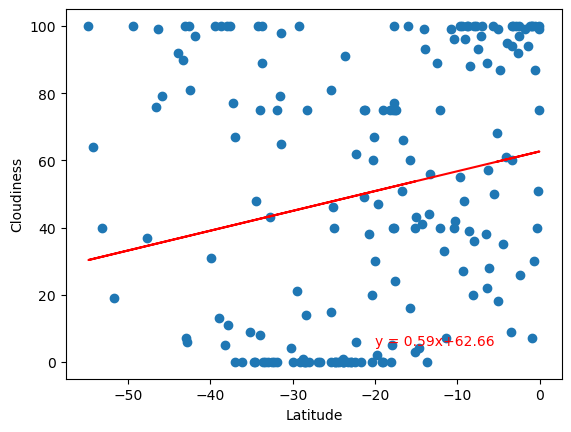

In [54]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
southern_hemi_line = southern_hemi_df['Lat']*round(slope,2) + round(intercept,2)
line = f'y = {round(slope,2)}x+{round(intercept,2)}'
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], southern_hemi_line, color='red')
plt.annotate(line, (-20,5),color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'r value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r value is 0.12516953598071517


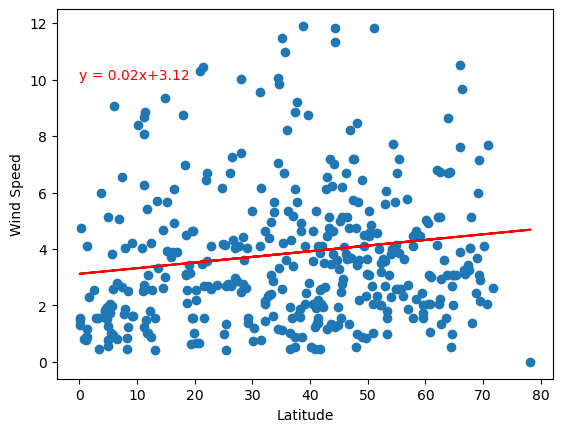

In [57]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
northern_hemi_line = northern_hemi_df['Lat']*round(slope,2) + round(intercept,2)
line = f'y = {round(slope,2)}x+{round(intercept,2)}'
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], northern_hemi_line, color='red')
plt.annotate(line, (0,10),color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'r value is {rvalue}')

r value is -0.17262291279052047


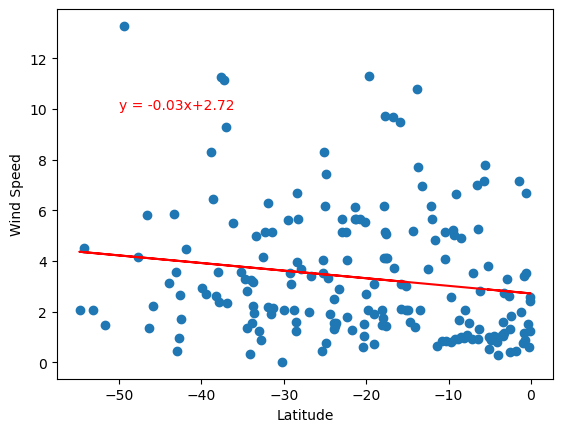

In [59]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
southern_hemi_line = southern_hemi_df['Lat']*round(slope,2) + round(intercept,2)
line = f'y = {round(slope,2)}x+{round(intercept,2)}'
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], southern_hemi_line, color='red')
plt.annotate(line, (-50,10),color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'r value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE